![data%20kubwa_logo_%E1%84%8B%E1%85%B0%E1%86%B8%E1%84%8B%E1%85%AD%E1%86%BC2%20%E1%84%87%E1%85%A9%E1%86%A8%E1%84%89%E1%85%A1%E1%84%87%E1%85%A9%E1%86%AB.png](attachment:data%20kubwa_logo_%E1%84%8B%E1%85%B0%E1%86%B8%E1%84%8B%E1%85%AD%E1%86%BC2%20%E1%84%87%E1%85%A9%E1%86%A8%E1%84%89%E1%85%A1%E1%84%87%E1%85%A9%E1%86%AB.png)

# 파이썬 - Seaborn 데이터 시각화
- Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.
- Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

https://seaborn.github.io/ 

# 1. Seaborn 스타일
- Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다. 
- 따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다르다. 자세한 내용은 다음 문서를 참조한다. <br>

http://seaborn.pydata.org/tutorial/aesthetics.html 


- `set` 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다.
- `set_style` 명령은 틱 스타일만 바꿀 수 있다. 
- `darkgrid`, `whitegrid`, `dark`, `white`, 그리고 `ticks` 스타일을 제공한다.

`set_color_codes` 명령으로는 기본 색상을 가리키는 문자열을 바꾼다. 
예를 들어 `set_color_codes` 명령이 적용되기 이전과 이후에 `red` 문자열이 가리키는 실제 색상 코드는 다르다.

* `set`: http://seaborn.pydata.org/generated/seaborn.set.html
* `set_style`: http://seaborn.pydata.org/generated/seaborn.set_style.html
* `set_color_codes`: http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
# 시스템 폰트 찾기
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if f.name.find('Nanum') != -1:
        print(f.name)

In [0]:
# 한글 폰트 설정
from matplotlib import rcParams

rcParams['font.family'] = 'AppleGothic'
rcParams['font.size'] = 10

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


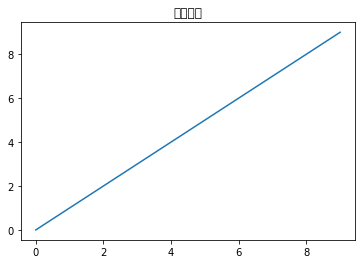

In [10]:
# 한글 폰트 확인하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(10))
ax.set_title('한글제목')
plt.show()

In [0]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

# 2. 색상 팔레트
- Seaborn은 스타일 지정을 위한 색상 팔렛트(color palette)라는 것을 지원한다. 
- 색상 팔렛트는 Matplotlib의 칼라맵(colormap)으로 사용할 수도 있다. 
- 자세한 내용은 Seaborn의 문서를 참조한다.

http://seaborn.pydata.org/tutorial/color_palettes.html

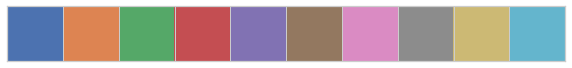

In [12]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

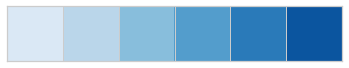

In [13]:
sns.palplot(sns.color_palette("Blues"))

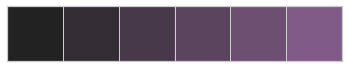

In [14]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

# 3. 1차원 분포 플롯
1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타낸다.

In [0]:
# 샘플 데이터 로딩
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### 3.1 1차원 실수형 플롯
실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다. 1차원 실수 분포 플롯 명령에는 `rugplot`, `kdeplot`, `distplot`이 있다.

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

* `rugplot`: http://seaborn.pydata.org/generated/seaborn.rugplot.html

In [0]:
x = iris.petal_length.values

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


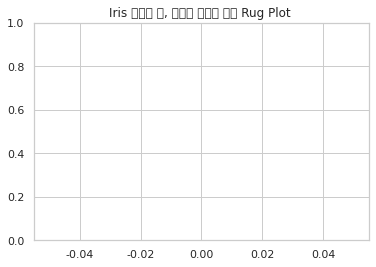

In [17]:
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

* `kdeplot`: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.

* http://scikit-learn.org/stable/modules/density.html

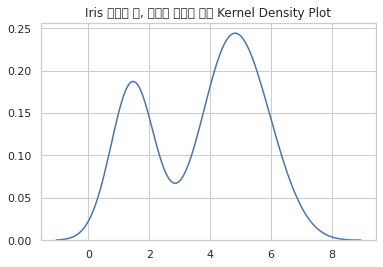

In [18]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

Seaborn의 `distplot` 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 `hist` 명령보다 많이 사용된다.

* `distplot`: http://seaborn.pydata.org/generated/seaborn.distplot.html

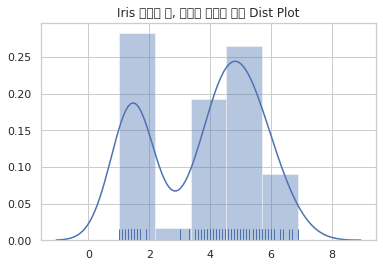

In [19]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 3.2  카운트 플랏
`countplot` 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다. 

* `countplot`: http://seaborn.pydata.org/generated/seaborn.countplot.html

`countplot` 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

```
countplot(x="column_name", data=dataframe)
```

`data` 인수에는 대상이 되는 데이터프레임을, `x` 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

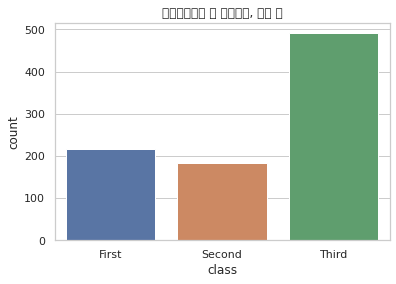

In [20]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

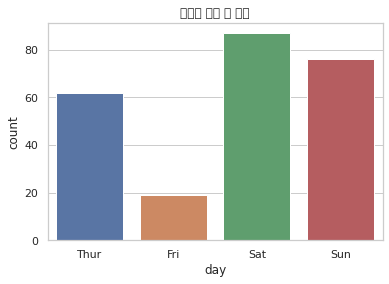

In [21]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# 4. 다차원 데이터
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

* 분석하고자 하는 데이터가 모두 실수 값인 경우
* 분석하고자 하는 데이터가 모두 카테고리 값인 경우
* 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

### 4.1 2차원 실수형 데이터
만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다. 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 `jointplot` 명령을 사용한다. `jointplot` 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.

* `jointplot`: http://seaborn.pydata.org/generated/seaborn.jointplot.html

`jointplot` 명령도 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

```
jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```

`data` 인수에는 대상이 되는 데이터프레임을, `x` 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을, `y` 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다. `kind`는 차트의 종류를 지정한다. `kind='scatter'`이면 스캐터 플롯이다.

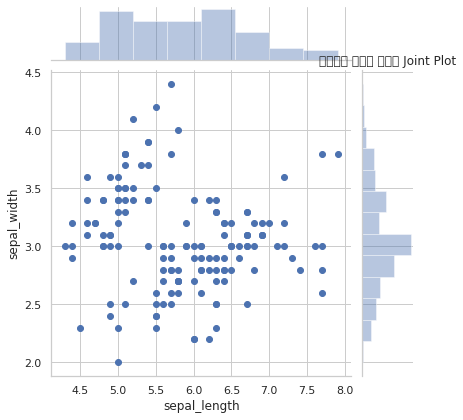

In [22]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.title("꽃받침의 길이와 넓이의 Joint Plot")
plt.show()

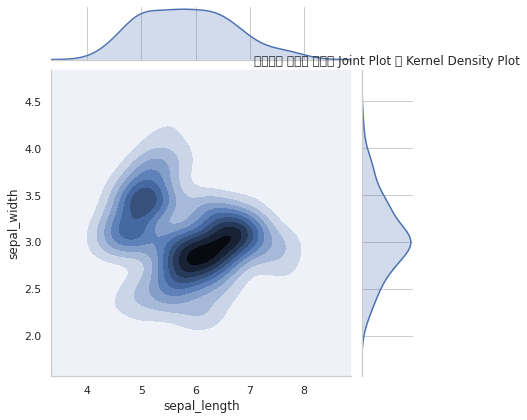

In [23]:
# `kind='kde'`이면 커널 밀도 히스토그램을 그린다.
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.title("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot")
plt.show()

### 4.4 다차원 실수형 데이터
만약 3차원 이상의 데이터라면 seaborn 패키지의 `pairplot` 명령을 사용한다. `pairplot`은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

* `pairplot`: http://seaborn.pydata.org/generated/seaborn.pairplot.html

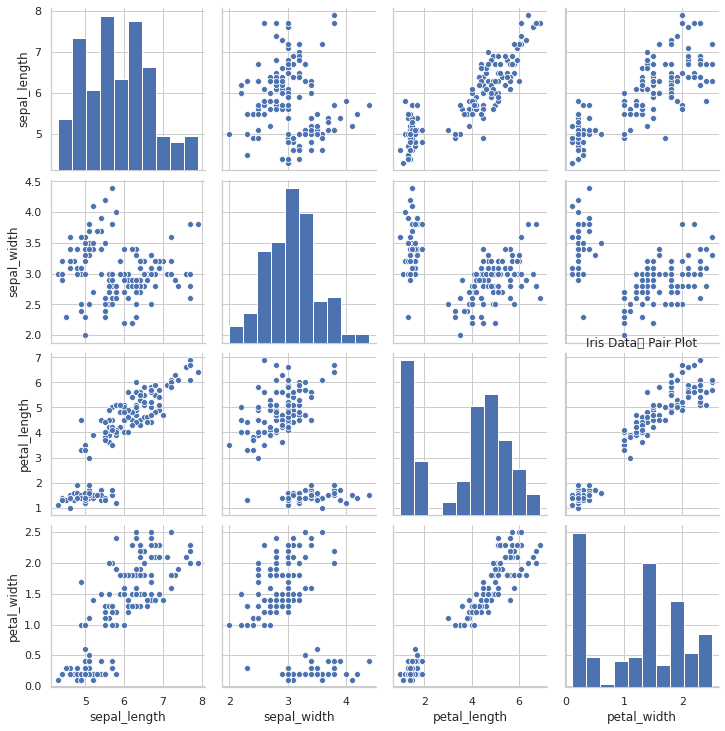

In [24]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 `hue` 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


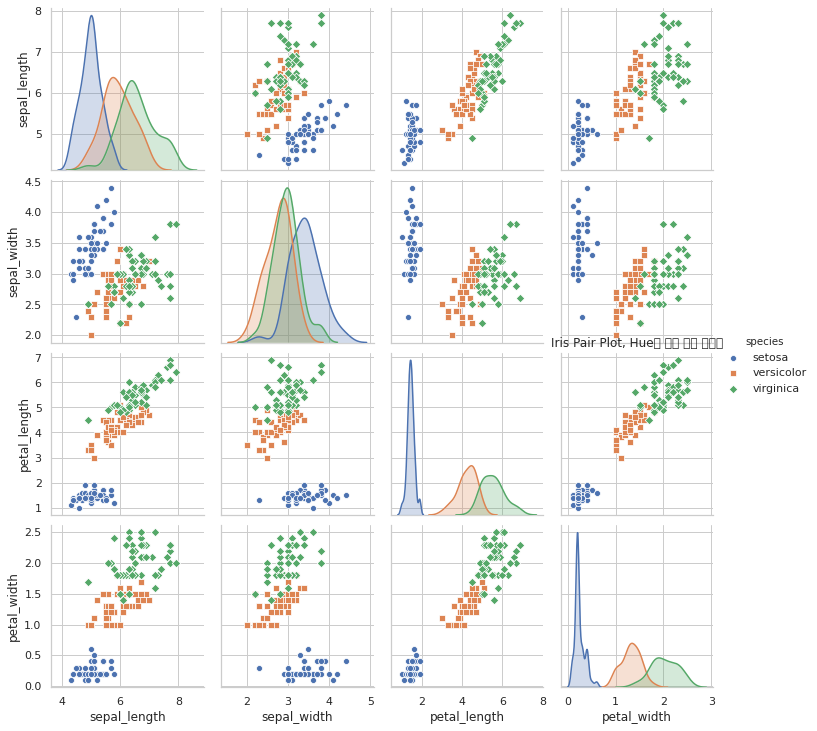

In [25]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 4.5 2차원 카테고리 데이터
만약 데이터가 2차원이고 모든 값이 카테고리  값이면  `heatmap` 명령을 사용한다.

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [26]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


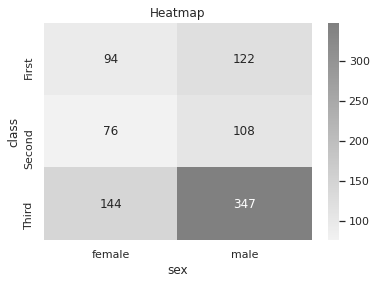

In [27]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 4.6 2차원 복합 데이터
만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

* `barplot`
* `boxplot`
* `pointplot`
* `violinplot`
* `stripplot`
* `swarmplot`

`barplot` 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

* `barplot`: http://seaborn.pydata.org/generated/seaborn.barplot.html

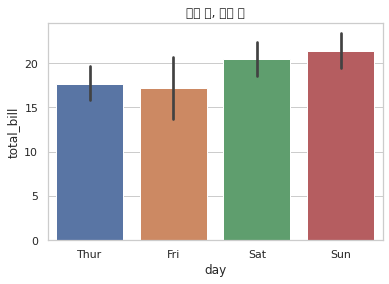

In [28]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

`boxplot` 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다. 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다. 

`boxplot`: http://seaborn.pydata.org/generated/seaborn.boxplot.html

- 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다.
- 박스 내부의 가로선은 중앙값을 나타낸다.
- 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다.
- 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

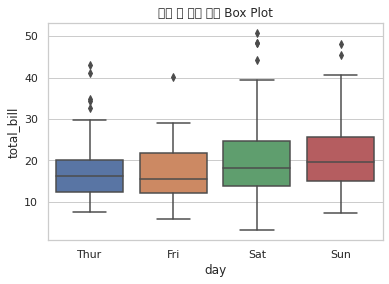

In [29]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

- `boxplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 `violinplot`, `stripplot`. `swarmplot` 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다. 

- `violinplot`은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

`violinplot`: http://seaborn.pydata.org/generated/seaborn.violinplot.html

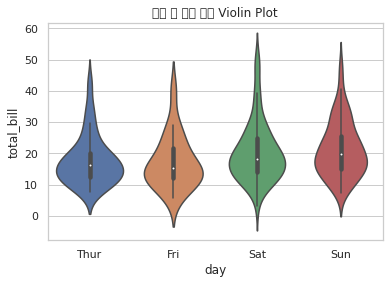

In [30]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

- `stripplot`은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. 
- `jitter=True`를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

`stripplot`: http://seaborn.pydata.org/generated/seaborn.stripplot.html

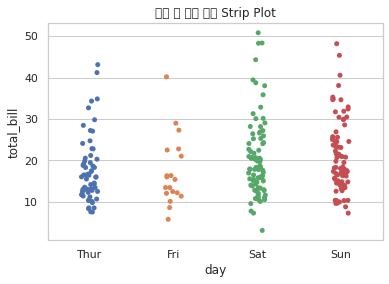

In [31]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

`swarmplot`은 `stripplot`과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.

`swarmplot`: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

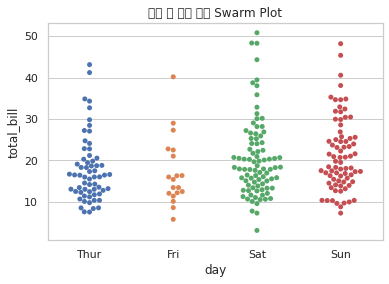

In [32]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

# 5. 다차원 복합 데이터
지금까지 소개한 대부분의 명령어에는 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있다. 

-  `barplot`, `violinplot`, `boxplot` 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 `hue` 인수를 제공한다. 
- `hue` 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화된다.  
- `hue` 값이 시각화되는 방법은 플롯의 종류에 따라 다르다.

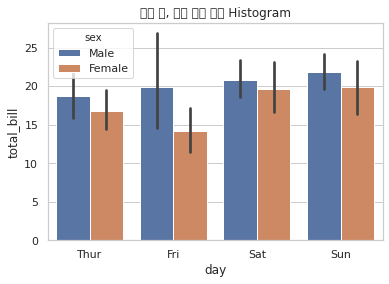

In [33]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

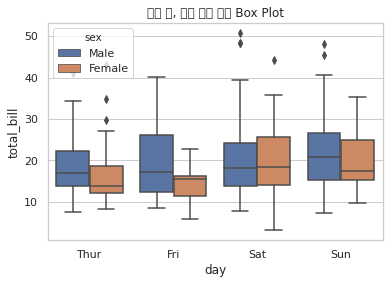

In [34]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

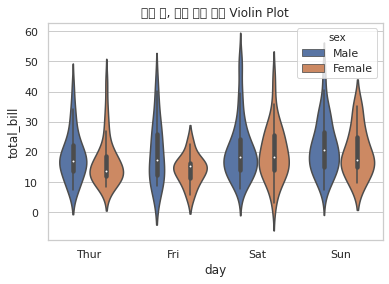

In [35]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

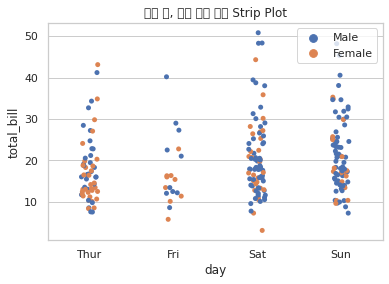

In [36]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

`heatmap`을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

`heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

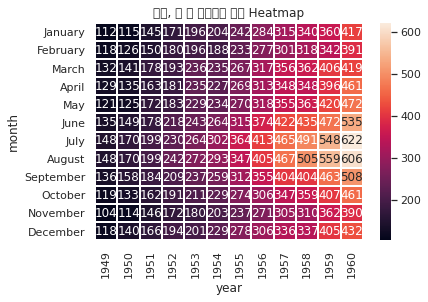

In [37]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

# 6. Catplot
`catplot`은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.

`catplot`: http://seaborn.pydata.org/generated/seaborn.factorplot.html

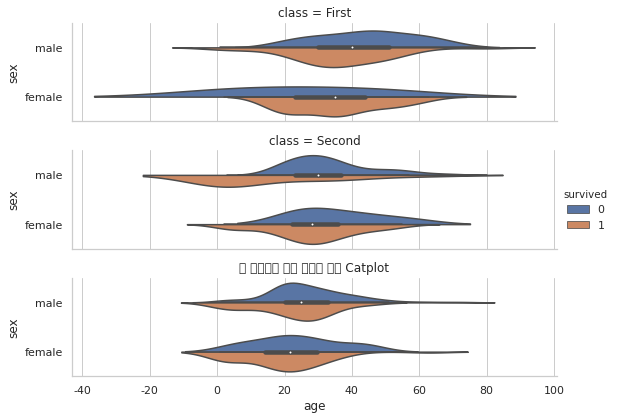

In [54]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

# 7. 기타
시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.

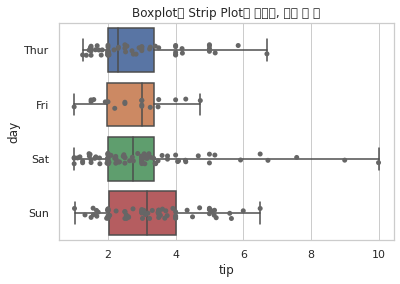

In [39]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

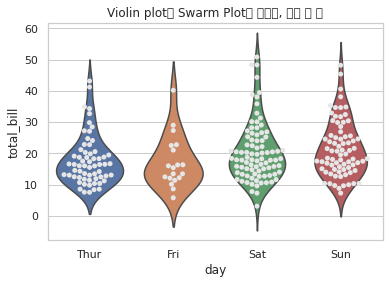

In [40]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

---------

# Pandas의 시각화 기능
- Pandas의 시리즈나 데이터프레임은 `plot`이라는 시각화 메서드를 내장하고 있다.
- `plot`은 matplotlib를 내부에서 임포트하여 사용한다. 

In [41]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
# df1 = pd.DataFrame(np.random.randn(100, 3))
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


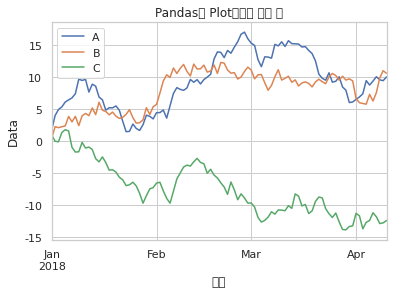

In [42]:
df1.plot()
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

#### `plot` 메서드의 `kind`라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

* `bar`
* `pie`
* `hist`
* `kde`
* `box`
* `scatter`
* `area`

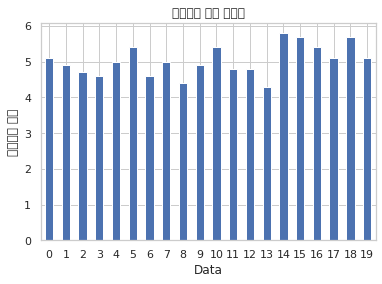

In [43]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

#### `kind` 인수에 문자열을 쓰는 대신 `plot.bar`처럼 직접 메서드로 사용할 수도 있다.

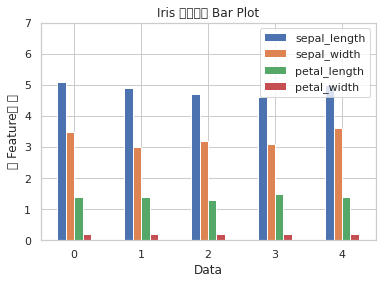

In [44]:
iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show()

In [45]:
# Groupby로 iris 데이터 그리기
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


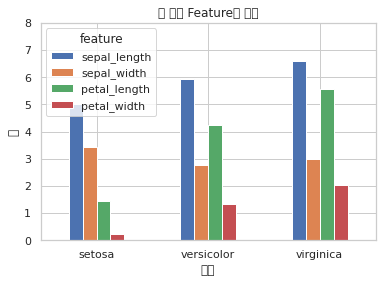

In [46]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.show()

Text(0, 0.5, '평균')

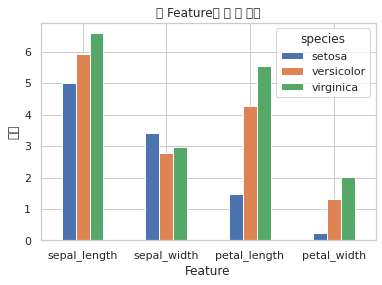

In [47]:
# 전치연산으로 시각화
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")

#### ``pie``,  ``hist``, ``kde``, ``box``, ``scatter`` 플롯 예제

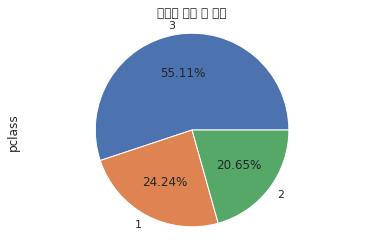

In [48]:
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

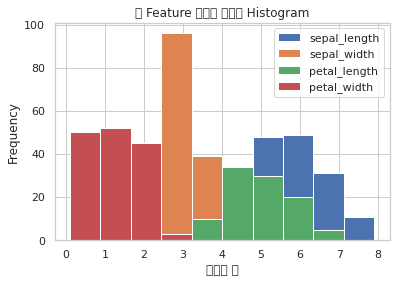

In [49]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

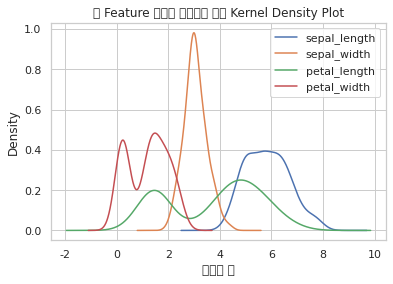

In [50]:
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

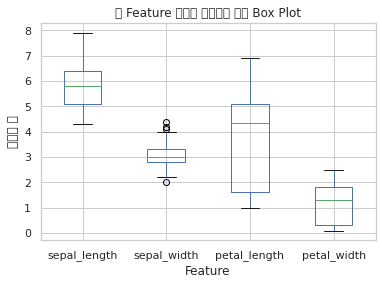

In [51]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

#### 박스플롯에 대해서는 추가적인 기능을 가진 `boxplot` 명령이 별도

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


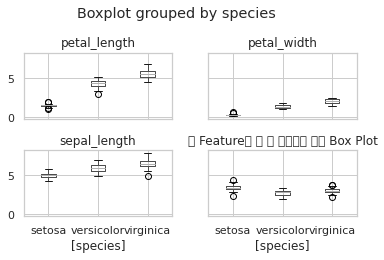

In [52]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()